In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
import os
import numpy as np

os.chdir('D:\Google Drive\Spring 2018\Courses\DataViz\GOT')

input_file = '.\data\got_violin_filtered_cumsum.csv'
output_dir = '.\output'

In [61]:
df = pd.read_csv(input_file)
df.head(10)

,Unnamed: 0,S1E1,S1E2,S1E3,S1E4,S1E5,S1E6,S1E7,S1E8,S1E9,...,S6E8,S6E9,S6E10,S7E1,S7E2,S7E3,S7E4,S7E5,S7E6,S7E7
0,season_num,1,1,1,1,1,1,1,1,1,...,6,6,6,7,7,7,7,7,7,7
1,episode_num,1,2,3,4,5,6,7,8,9,...,8,9,10,1,2,3,4,5,6,7
2,Arya Stark,722,1322,1887,2244,2528,2787,2787,3014,3402,...,17161,17161,17214,17505,17887,17887,18571,18980,19503,19958
3,Daenerys Targaryen,819,1397,1702,1975,1975,2559,3137,3516,4082,...,18362,18983,19427,19761,20499,21453,22178,23056,23974,25200
4,Jon Snow,1099,1938,2554,3421,3421,3421,4082,4526,4980,...,22535,24323,25012,25474,25970,27163,27817,28741,30966,32852
5,Tyrion Lannister,383,949,1584,1958,2386,3173,3173,3698,4625,...,26245,26879,27107,27441,28126,29434,29682,30697,31068,32956


In [62]:
sns.set_style("white")
font_h1 = {'family': 'Segoe UI',
           'color': 'black',
           'weight': 'semibold',
           'size': 14,
           'horizontalalignment': 'center'}
font_h2 = {'family': 'Segoe UI',
            'color': 'black',
            'weight': 'regular',
            'size': 10,
            'horizontalalignment': 'left'}
font_title = {'family': 'Segoe UI',
              'color': 'black',
              'weight': 'regular',
              'size': 12}

In [63]:
def frame(i):
    
    a = list(np.repeat(1,df.iloc[:,i][2]))
    d = list(np.repeat(2,df.iloc[:,i][3]))
    j = list(np.repeat(3,df.iloc[:,i][4]))
    t = list(np.repeat(4,df.iloc[:,i][5]))

    return a+d+j+t

In [64]:
#Arya = 1
#Jon = 2
#Danny = 3
#Tyrion = 4

for i, column in enumerate(df):
    if i==0: continue
    plt.figure()
    violin = sns.violinplot(x=frame(i), inner=None, palette='Paired', bw=0.4)
    plt.title(column, fontdict=font_title)
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(-2, 5)
    plt.xticks([1, 2, 3, 4], 
               ['Arya Stark',
                'Daenerys Targaryen',
                'Jon Snow',
                'Tyrion Lannister'],
                rotation=45,
                fontname='Segoe UI')
    plt.tight_layout()
    plt.savefig('{0:03.0f}_{1}.png'.format(i, column), dpi=300)
    plt.close()

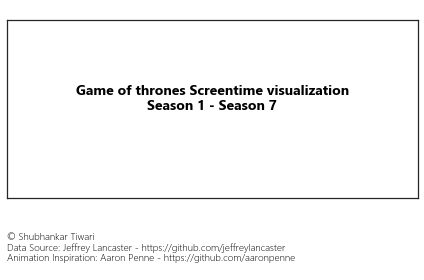

In [65]:
sns.set_style('white', {'xtick.color': 'white', 'axes.labelcolor': 'white'})
plt.figure()
violin = sns.violinplot(x=frame(1), inner=None, palette='Paired', bw=0.4)
plt.text(2, -1.5,
         'Game of thrones Screentime visualization\nSeason 1 - Season 7',
         fontdict=font_h1)
plt.text(-1, -2.35,
         '© Shubhankar Tiwari\nData Source: Jeffrey Lancaster - https://github.com/jeffreylancaster\
         \nAnimation Inspiration: Aaron Penne - https://github.com/aaronpenne',
         fontdict=font_h2)
plt.title(' ')
plt.ylim(-2, -1)
plt.xlim(-1, 5)
plt.xticks([1, 2, 3, 4], 
               ['Arya Stark',
                'Daenerys Targaryen',
                'Jon Snow',
                'Tyrion Lannister'],
            rotation=45)
violin.xaxis.label.set_color('white')
plt.xlabel('')
plt.tight_layout()
plt.savefig('999.png', dpi=300)

In [66]:
png_files = [f for f in os.listdir('.') if f.endswith('.png')]

charts = []
# Append the title chart - https://stackoverflow.com/a/35943809
for i in range(5):
    charts.append(imageio.imread('999.png'))

# Append all the charts (except the title slide)
for f in png_files[:-1]:
    charts.append(imageio.imread(f))

# Append the last chart a few extra times
for i in range(3):
    charts.append(imageio.imread(f))

# Save gif
imageio.mimsave('ssm_violin.gif', charts, format='GIF', duration=0.1)